In [30]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold 
import matplotlib.pyplot as plt
from torch.utils.data import Subset
from sklearn.metrics import roc_curve, auc, roc_auc_score, confusion_matrix, accuracy_score, f1_score, matthews_corrcoef,recall_score,precision_score

In [31]:
def metrics_output(preds,labels):
    true_labels = np.array(labels)
    predicted_probs = np.array(preds)
    binary_predictions = (predicted_probs >= 0.5).astype(int)
    auc = roc_auc_score(true_labels, predicted_probs)
    conf_matrix = confusion_matrix(true_labels, binary_predictions)
    tn, fp, fn, tp = conf_matrix.ravel()
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    accuracy = accuracy_score(true_labels, binary_predictions)
    f1 = f1_score(true_labels, binary_predictions)
    mcc = matthews_corrcoef(true_labels, binary_predictions)  
    return (auc, sensitivity, specificity, accuracy, f1, mcc)

In [32]:
file_path = '/Users/jiaming/Desktop/Lab2/datas/ROC/test'
# 4 ML
y_test_pred_lr = np.load(file_path + '/y_test_pred_lr.npy')
y_test_pred_nb = np.load(file_path + '/y_test_pred_nb.npy')
y_test_pred_rf = np.load(file_path + '/y_test_pred_rf.npy')
y_test_pred_xgb = np.load(file_path + '/y_test_pred_xgb.npy')

# 2 DL
y_test_pred_lstm = np.load(file_path + '/LSTM/lstm_y_test_pred.npy')
y_test_pred_resnet = np.load(file_path + '/ResNet/resnet_y_test_pred.npy')

# Backup (not selected for ensemble mdoel construction)
y_test_pred_svm = np.load(file_path + '/y_test_pred_svm.npy')
y_test_pred_cnn = np.load(file_path + '/CNN/cnn_y_test_pred.npy')
y_test_pred_transformer = np.load(file_path + '/Transformer/transformer_y_test_pred.npy')

# Label
y_test = np.load(file_path + '/y_test_lr.npy') # y_label = np.array(y_test)

In [33]:
def metrics_output(preds,labels):
    true_labels = np.array(labels)
    predicted_probs = np.array(preds)
    binary_predictions = (predicted_probs >= 0.5).astype(int)
    auc = roc_auc_score(true_labels, predicted_probs)
    conf_matrix = confusion_matrix(true_labels, binary_predictions)
    tn, fp, fn, tp = conf_matrix.ravel()
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    accuracy = accuracy_score(true_labels, binary_predictions)
    f1 = f1_score(true_labels, binary_predictions)
    mcc = matthews_corrcoef(true_labels, binary_predictions)  
    return (auc, sensitivity, specificity, accuracy, f1, mcc)

## 1. LR + LSTM (top 2)

In [34]:
predicted_probabilities = (np.array(y_test_pred_lr) +
                           np.array(y_test_pred_lstm).reshape(-1)
                           )/2
predicted_probabilities = np.array(predicted_probabilities)

roc_auc, metrics_sn, metrics_sp, metrics_ACC, metrics_F1, metrics_MCC = metrics_output(predicted_probabilities, y_test)
print(roc_auc, metrics_sn, metrics_sp, metrics_ACC, metrics_F1, metrics_MCC)

fpr1, tpr1, _ = roc_curve(y_test, predicted_probabilities)
roc_auc1 = auc(fpr1, tpr1)
print(f'roc_auc1: {roc_auc1}')

0.7177128427128427 0.6893939393939394 0.6746031746031746 0.6821705426356589 0.6893939393939394 0.363997113997114
roc_auc1: 0.7177128427128427


## 2. (LR + NB) + LSTM (top 2 in ML and top 1 in DL)

In [35]:
predicted_probabilities = (np.array(y_test_pred_lr) +
                           np.array(y_test_pred_nb) +
                           np.array(y_test_pred_lstm).reshape(-1)
                           )/3
predicted_probabilities = np.array(predicted_probabilities)

roc_auc, metrics_sn, metrics_sp, metrics_ACC, metrics_F1, metrics_MCC = metrics_output(predicted_probabilities, y_test)
print(roc_auc, metrics_sn, metrics_sp, metrics_ACC, metrics_F1, metrics_MCC)

fpr2, tpr2, _ = roc_curve(y_test, predicted_probabilities)
roc_auc2 = auc(fpr2, tpr2)
print(f'roc_auc2: {roc_auc2}')

0.7145262145262146 0.1893939393939394 0.9126984126984127 0.5426356589147286 0.2976190476190476 0.14727794310121886
roc_auc2: 0.7145262145262146


## 3. (LR + NB) + ResNet (top 2 in ML and rank 2 in DL)

In [36]:
predicted_probabilities = (np.array(y_test_pred_lr) + 
                           np.array(y_test_pred_nb) +
                           np.array(y_test_pred_resnet.reshape(-1))
                           )/3
predicted_probabilities = np.array(predicted_probabilities)

roc_auc, metrics_sn, metrics_sp, metrics_ACC, metrics_F1, metrics_MCC = metrics_output(predicted_probabilities, y_test)
print(roc_auc, metrics_sn, metrics_sp, metrics_ACC, metrics_F1, metrics_MCC)

fpr3, tpr3, _ = roc_curve(y_test, predicted_probabilities)
roc_auc3 = auc(fpr3, tpr3)
print(f'roc_auc3: {roc_auc3}')

0.6970899470899471 0.13636363636363635 0.9285714285714286 0.5232558139534884 0.22641509433962262 0.10603851700360079
roc_auc3: 0.6970899470899471


## 4. (LR + NB + RF) + LSTM (top 4)

In [38]:
predicted_probabilities = (np.array(y_test_pred_lr) + 
                           np.array(y_test_pred_nb) +
                           np.array(y_test_pred_rf) + 
                           np.array(y_test_pred_lstm).reshape(-1)
                           )/4
predicted_probabilities = np.array(predicted_probabilities)

roc_auc, metrics_sn, metrics_sp, metrics_ACC, metrics_F1, metrics_MCC = metrics_output(predicted_probabilities, y_test)
print(roc_auc, metrics_sn, metrics_sp, metrics_ACC, metrics_F1, metrics_MCC)

fpr4, tpr4, _ = roc_curve(y_test, predicted_probabilities)
roc_auc4 = auc(fpr4, tpr4)
print(f'roc_auc4: {roc_auc4}')

0.7035233285233284 0.2878787878787879 0.8968253968253969 0.5852713178294574 0.4153005464480875 0.23183484553853875
roc_auc4: 0.7035233285233284


## 5. (LR + NB + RF + XGB) + LSTM (top 5)

In [41]:
predicted_probabilities = (np.array(y_test_pred_lr) + 
                           np.array(y_test_pred_nb) +
                           np.array(y_test_pred_rf) + 
                           np.array(y_test_pred_xgb) + 
                           np.array(y_test_pred_lstm).reshape(-1)
                           )/5
predicted_probabilities = np.array(predicted_probabilities)

roc_auc, metrics_sn, metrics_sp, metrics_ACC, metrics_F1, metrics_MCC = metrics_output(predicted_probabilities, y_test)
print(roc_auc, metrics_sn, metrics_sp, metrics_ACC, metrics_F1, metrics_MCC)

fpr5, tpr5, _ = roc_curve(y_test, predicted_probabilities)
roc_auc5 = auc(fpr5, tpr5)
print(f'roc_auc5: {roc_auc5}')

0.6976310726310726 0.36363636363636365 0.8571428571428571 0.6046511627906976 0.4848484848484849 0.25293437277353664
roc_auc5: 0.6976310726310726


## Ensemble ROC

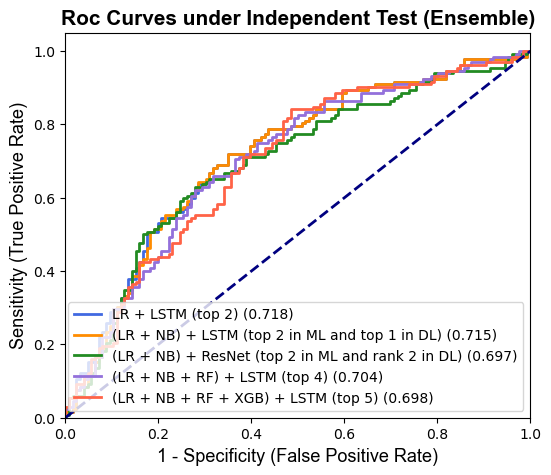

In [44]:
plt.figure(figsize=(6, 5))
lw = 2
plt.plot(
    fpr1,
    tpr1,
    color="royalblue",
    lw=lw,
    label=f"LR + LSTM (top 2) ({roc_auc1:.3f})",
)
plt.plot(
    fpr2,
    tpr2,
    color="darkorange",
    lw=lw,
    label=f"(LR + NB) + LSTM (top 2 in ML and top 1 in DL) ({roc_auc2:.3f})",
)
plt.plot(
    fpr3,
    tpr3,
    color="forestgreen",
    lw=lw,
    label=f"(LR + NB) + ResNet (top 2 in ML and rank 2 in DL) ({roc_auc3:.3f})",
)
plt.plot(
    fpr4,
    tpr4,
    color="mediumpurple",
    lw=lw,
    label=f"(LR + NB + RF) + LSTM (top 4) ({roc_auc4:.3f})",
)
plt.plot(
    fpr5,
    tpr5,
    color="tomato",
    lw=lw,
    label=f"(LR + NB + RF + XGB) + LSTM (top 5) ({roc_auc5:.3f})",
)

font1 = {'family' : 'Arial',
'weight' : 'bold',
'size' : 15,
}
font2 = {'family' : 'Arial',
'weight' : 'normal',
'size' : 13,
}
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("1 - Specificity (False Positive Rate)", font2)
plt.ylabel("Sensitivity (True Positive Rate)", font2)
plt.title("Roc Curves under Independent Test (Ensemble)",font1)
plt.legend(loc="lower right")
plt.savefig('/Users/jiaming/Desktop/Lab2/datas/ROC/ROC_ensemble.pdf', format='pdf')